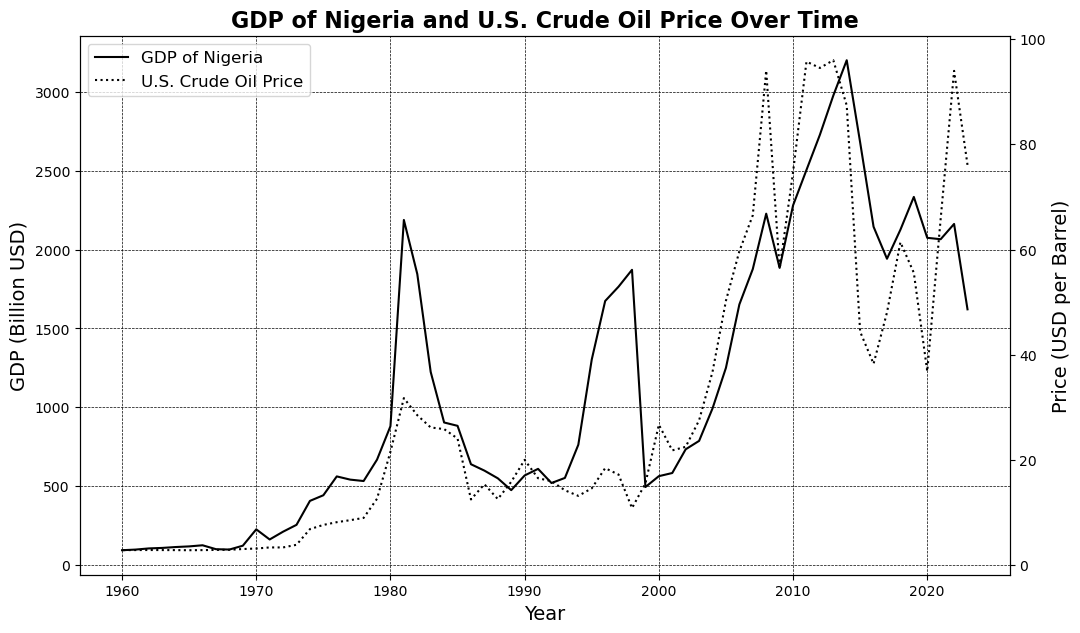

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the GDP data for Nigeria
file_path_gdp = 'GDP_Nigeria.csv'
data_gdp = pd.read_csv(file_path_gdp)

# Load the U.S. crude oil price data
file_path_oil = 'US_Crude_Oil_First_Purchase_Price.csv'
data_oil = pd.read_csv(file_path_oil)

# Convert columns to appropriate types
data_oil['Year'] = pd.to_numeric(data_oil['Year'], errors='coerce')
data_oil['Price'] = pd.to_numeric(data_oil['Price'], errors='coerce')

# Filter oil data to match the starting year of GDP data
start_year = data_gdp['Variable observation date'].min()
data_oil_filtered = data_oil[data_oil['Year'] >= start_year]

# Create the plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Nigeria GDP on the first y-axis (line only)
ax1.plot(data_gdp['Variable observation date'], data_gdp['Variable observation value'], 
         color='black', linestyle='-', label='GDP of Nigeria')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('GDP (Billion USD)', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the U.S. crude oil price (line only)
ax2 = ax1.twinx()
ax2.plot(data_oil_filtered['Year'], data_oil_filtered['Price'], 
         color='black', linestyle=':', label='U.S. Crude Oil Price')
ax2.set_ylabel('Price (USD per Barrel)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and grid
plt.title('GDP of Nigeria and U.S. Crude Oil Price Over Time', fontsize=16, fontweight='bold')
ax1.grid(color='black', linestyle='--', linewidth=0.5)

# Add legends for both lines
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

# Set background to white
fig.patch.set_facecolor('white')
# save the plot as a pdf file
fig.savefig('GDP_Oil_Price.pdf')
# Display the plot
plt.show()
